# <font color=orange> Local Search </font>


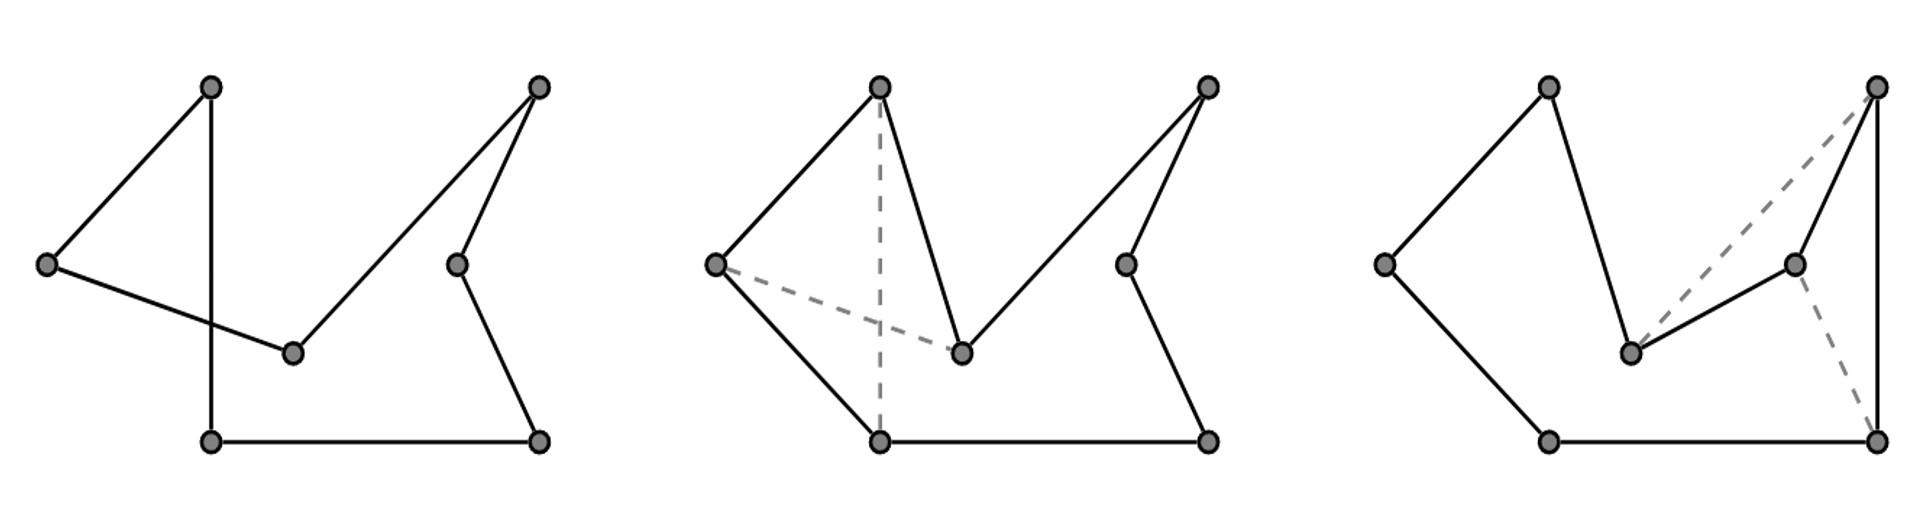

## Step1: Reuse the Previous Greedy Algorithm for TSP

Greedy Algorithm total distance: 36688


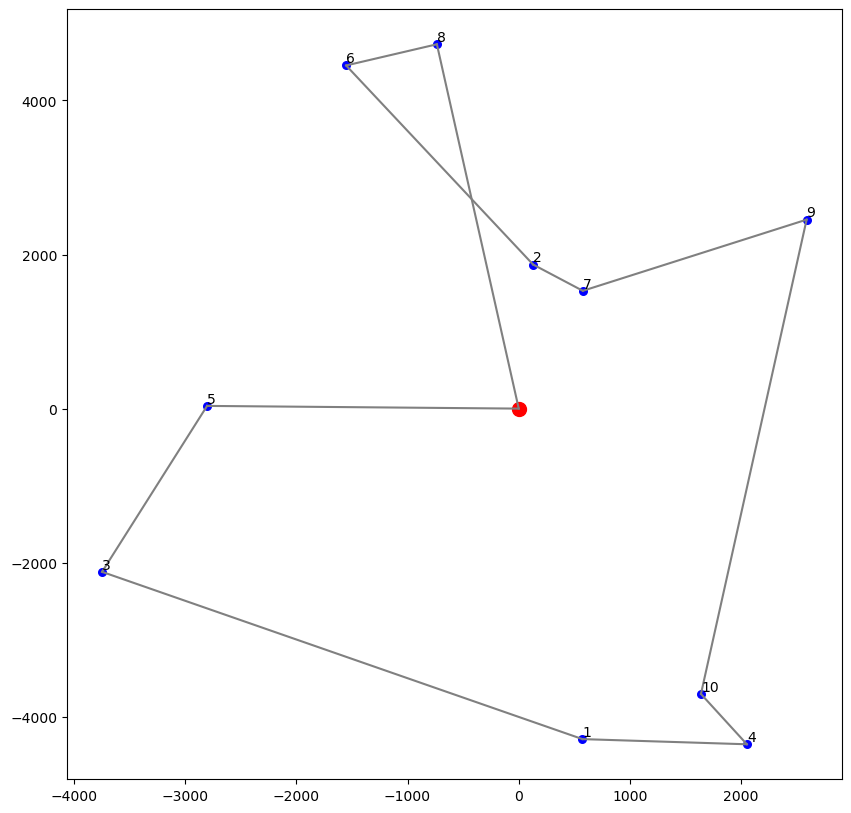

In [2]:
import random as rd 
import matplotlib.pyplot as plt
service_radius=5000
number_of_customers=10
plt.rcParams["figure.figsize"] = (10,10)

def setup ():
    x=[0] #put deport (start point) at the middle of service area
    y=[0]   
    for i in range (1,number_of_customers+1):
        x.append(int(rd.uniform(-service_radius,service_radius)))
        y.append(int(rd.uniform(-service_radius,service_radius)))
    return(x,y)

def show (x,y):
    plt.scatter(x[0],y[0], s=100, c='r') 
    for i in range (1,number_of_customers+1):
        plt.scatter(x[i],y[i], s=30, c='b')
        plt.text(x[i],y[i], i,va='bottom')
        
def visualize (route):
    show (x,y)
    for i in range (len(route)-1):
        plt.plot([x[route[i]],x[route[i+1]]],[y[route[i]],y[route[i+1]]],"Gray")         
    plt.show()
    
def objective(route):
    total_distance=0
    for i in range(len(route)-1):
        total_distance+=abs(x[route[i]]-x[route[i+1]])+abs(y[route[i]]-y[route[i+1]])
    return(total_distance)

def greedy():
    result=[0,0]
    for i in range (1,number_of_customers+1):
        min_cost=float("inf")
        for j in range(1,len(result)):
            temp=result.copy()
            temp.insert(j,i)
            if objective(temp)<min_cost:
                min_cost=objective(temp)
                best_location=j
        result.insert(best_location,i)
        #print (result)
        #visualize (result)
    return(result)


x,y=setup()
result=greedy()
print("Greedy Algorithm total distance:", objective(result))
visualize(result)


In [3]:
a = min(1,2,3,4,5)
print(a)

1


## Step 2: Design a 2-opt Local Search Function
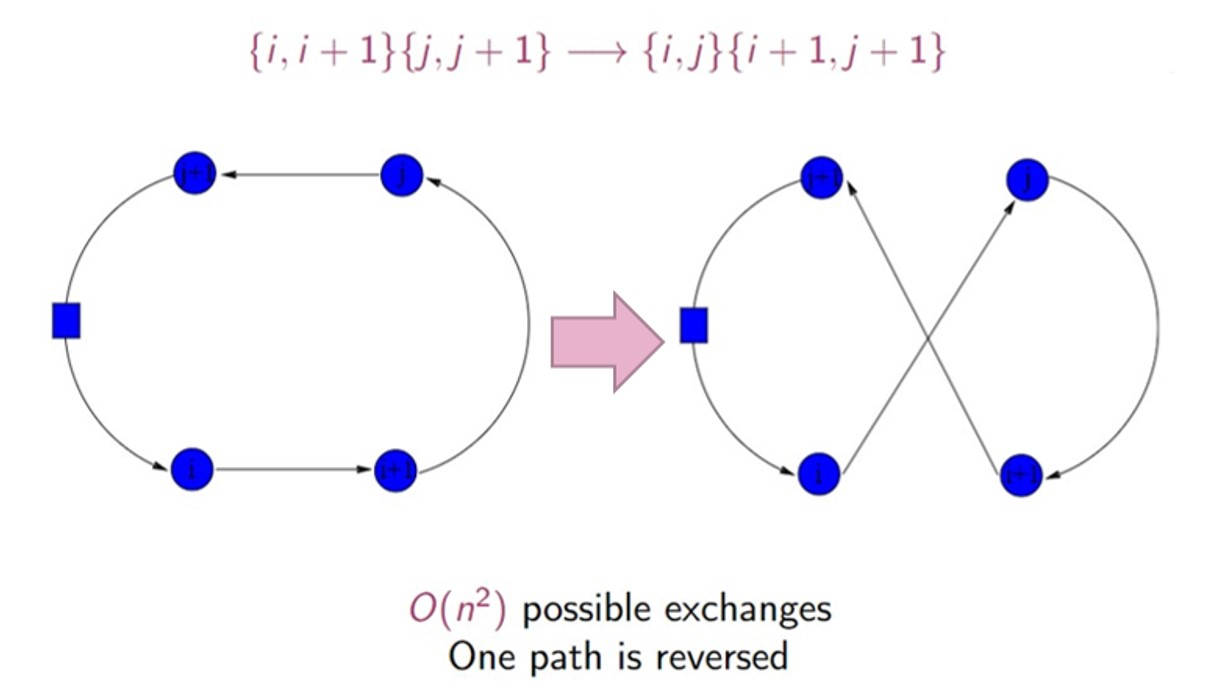

## Visulize Version for Tracing the Local Search Improvement

In [4]:
#2-opt local search
def local_search(route):
    found_improvement=1
    while found_improvement==1:
        found_improvement=0
        for i in range(1, len(route)-1):
            for j in range (i+2, len(route)):
                if j+1>=len(route):
                    continue  
                change_distance=objective([route[i],route[j]])+objective([route[i+1],route[j+1]])-objective([route[i],route[i+1]])-objective([route[j],route[j+1]])
                if change_distance<0:
                    
                    #print(route,"distance:", objective(route))
                    #print("cut:", route[i],route[i+1], "and" ,route[j],route[j+1] )
                    #print("add:", route[i],route[j], "and" ,route[i+1],route[j+1] )
                    print (route[i+2:j], "reverse as", route[j-1:i+1:-1])
                    route[i+1],route[i+2:j],route[j]=route[j],route[j-1:i+1:-1],route[i+1]
                    found_improvement=1
                    #visualize (route)
    return(route)



Initial route: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 0] with distance: 310942


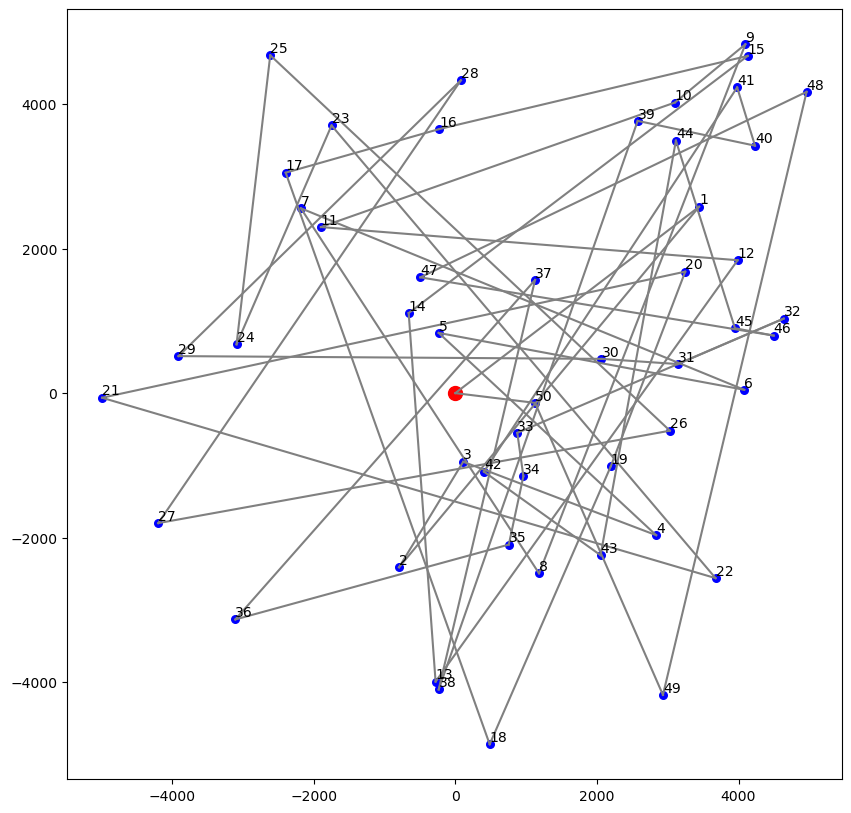

[] reverse as []
[2] reverse as [2]
[2, 3] reverse as [3, 2]
[3, 2, 4] reverse as [4, 2, 3]
[4, 2, 3, 5] reverse as [5, 3, 2, 4]
[5, 3, 2, 4, 6, 8, 9] reverse as [9, 8, 6, 4, 2, 3, 5]
[9, 8, 6, 4, 2, 3, 5, 7, 11, 12, 13] reverse as [13, 12, 11, 7, 5, 3, 2, 4, 6, 8, 9]
[13, 12, 11, 7, 5, 3, 2, 4, 6, 8, 9, 10] reverse as [10, 9, 8, 6, 4, 2, 3, 5, 7, 11, 12, 13]
[10, 9, 8, 6, 4, 2, 3, 5, 7, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21] reverse as [21, 20, 19, 18, 17, 16, 14, 13, 12, 11, 7, 5, 3, 2, 4, 6, 8, 9, 10]
[21, 20, 19, 18, 17, 16, 14, 13, 12, 11, 7, 5, 3, 2, 4, 6, 8, 9, 10, 15, 23, 24] reverse as [24, 23, 15, 10, 9, 8, 6, 4, 2, 3, 5, 7, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21]
[24, 23, 15, 10, 9, 8, 6, 4, 2, 3, 5, 7, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22] reverse as [22, 21, 20, 19, 18, 17, 16, 14, 13, 12, 11, 7, 5, 3, 2, 4, 6, 8, 9, 10, 15, 23, 24]
[22, 21, 20, 19, 18, 17, 16, 14, 13, 12, 11, 7, 5, 3, 2, 4, 6, 8, 9, 10, 15, 23, 24, 25, 27, 28, 29] reverse as [29, 28, 27, 25, 24, 23

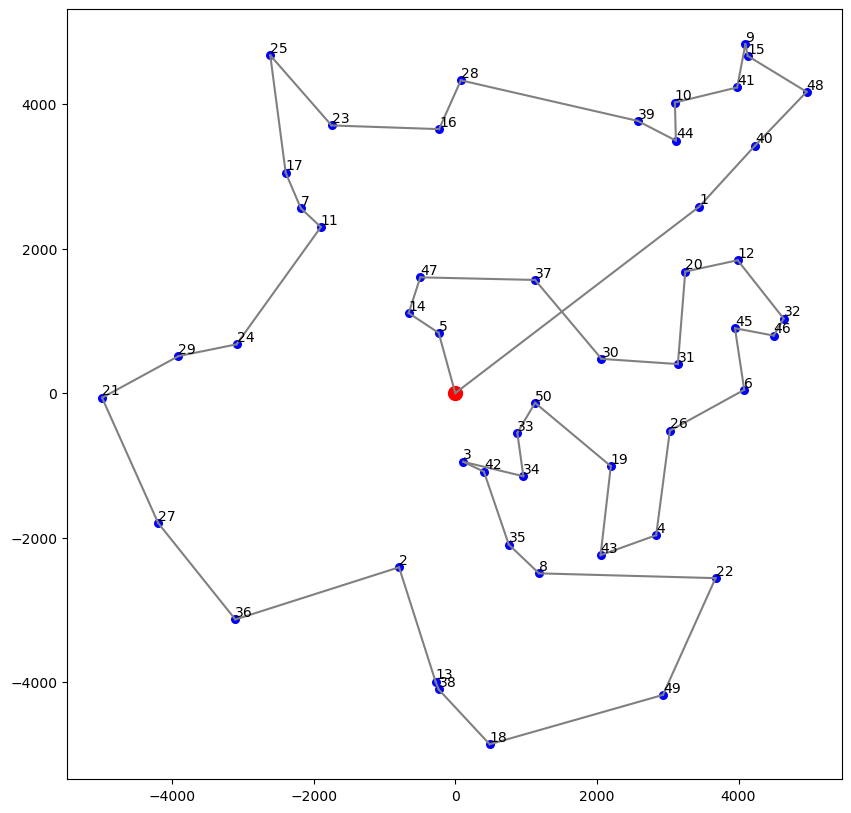

In [5]:
# Test with either a random initial_route or greedy algorithm route
# Use random seed to fix the problem generated
rd.seed(0) 
number_of_customers=50
x,y=setup()

#Choose either a random initial_route or greedy algorithm route by "#"
initial_route=[0]+[x for x in range(1,number_of_customers+1)]+[0]
#initial_route=greedy()

print("Initial route:",initial_route,"with distance:" , objective(initial_route))
visualize (initial_route)

result=local_search(initial_route)
print("Local search result:",result,"with distance:" , objective(result))
visualize (result)

## Final Version

In [6]:
import random as rd 
import matplotlib.pyplot as plt
service_radius=5000
number_of_customers=10
plt.rcParams["figure.figsize"] = (6,6)
    
def setup ():
    x=[0] #put deport (start point) at the middle of service area
    y=[0]   
    for i in range (1,number_of_customers+1):
        x.append(int(rd.uniform(-service_radius,service_radius)))
        y.append(int(rd.uniform(-service_radius,service_radius)))
    return(x,y)

def show (x,y):
    plt.scatter(x[0],y[0], s=100, c='r')     
    for i in range (1,number_of_customers+1):
        plt.scatter(x[i],y[i], s=50, c='b')
        #plt.text(x[i],y[i], i,va='bottom')
        
def visualize (route):
    show (x,y)
    for i in range (len(route)-1):
        plt.plot([x[route[i]],x[route[i+1]]],[y[route[i]],y[route[i+1]]],"Gray") 
        plt.annotate(i, (x[i], y[i]), xytext=(5,5), textcoords='offset points')
    plt.show()
    
def objective(route):
    total_distance=0
    for i in range(len(route)-1):
        total_distance+=abs(x[route[i]]-x[route[i+1]])+abs(y[route[i]]-y[route[i+1]])
    return(total_distance)

def greedy():
    result=[0,0]
    for i in range (1,number_of_customers+1):
        min_cost=float("inf")
        for j in range(1,len(result)):
            temp=result.copy()
            temp.insert(j,i)
            if objective(temp)<min_cost:
                min_cost=objective(temp)
                best_location=j
        result.insert(best_location,i)
    return(result)

#2-opt local search
def local_search(route):
    found_improvement=1
    while found_improvement==1:
        found_improvement=0
        for i in range(1, len(route)-1):
            for j in range (i+2, len(route)):
                if j+1>=len(route):
                    continue  
                change_distance=objective([route[i],route[j]])+objective([route[i+1],route[j+1]])-objective([route[i],route[i+1]])-objective([route[j],route[j+1]])
                if change_distance<0:
                    route[i+1],route[i+2:j],route[j]=route[j],route[j-1:i+1:-1],route[i+1]
                    found_improvement=1
    return(route)

def local_search_3opt(route):
    found_improvement=1
    count=0
    while found_improvement==1:
        found_improvement=0
        for i in range(1, len(route)-2):
            for j in range (i+2, len(route)-1):
                for k in range(j+2, len(route)):
                    if k+2>=len(route):
                        continue 
                    #print(i,j,k)
                    change_distance1=objective([route[i],route[k]])+objective([route[i+1],route[j+1]])+objective([route[j],route[k+1]])-objective([route[i],route[i+1]])-objective([route[j],route[j+1]])-objective([route[k],route[k+1]])
#                     change_distance2=objective([route[i],route[j+1]])+objective([route[i+1],route[k+1]])+objective([route[j],route[k]])-objective([route[i],route[i+1]])-objective([route[j],route[j+1]])-objective([route[k],route[k+1]])
#                     change_distance3=objective([route[i],route[j]])+objective([route[i+1],route[k]])+objective([route[j],route[k+1]])-objective([route[i],route[i+1]])-objective([route[j],route[j+1]])-objective([route[k],route[k+1]])
                    change_distance4=objective([route[i],route[j+1]])+objective([route[i+1],route[k]])+objective([route[j],route[k+1]])-objective([route[i],route[i+1]])-objective([route[j],route[j+1]])-objective([route[k],route[k+1]])
                    change_distance5=objective([route[k+1],route[i+1]])+objective([route[j],route[k]])+objective([route[j+1],route[i]])-objective([route[i],route[i+1]])-objective([route[j],route[j+1]])-objective([route[k],route[k+1]])
                    
                    changefinal = min(change_distance1,change_distance4,change_distance5)
                    if changefinal<0:
                        count+=1

                        if changefinal == change_distance1:
                            #print("Change 1")
                            route[i+1],route[j],route[j+1],route[k]=route[k],route[j+1],route[i+1],route[j]
                            route[j+2:k]=route[k-1:j+1:-1]
                            #print(route)
                            found_improvement=1
#                         elif changefinal == change_distance2:
#                             #print("Change 2")
#                             route[i+1],route[j+1],route[k]=route[j+1],route[k],route[i+1]
#                             route[j+1:i+1]=route[i:j:-1]
#                             found_improvement=1
#                         elif changefinal == change_distance3:
#                             #print("Change 3")
#                             route[i+1],route[j],route[j+1],route[k]=route[j],route[i+1],route[k],route[j+1]
#                             route[j+1:i+1]=route[i:j:-1]
#                             route[j+2:k]=route[k-1:j+1:-1]
#                             found_improvement=1
                        elif changefinal == change_distance4:
                            #print("Change 4")
                            route[i+1],route[j+1],route[k],route[j]=route[j+1],route[i+1],route[j],route[k]
                            found_improvement=1    
                        elif changefinal == change_distance5 and route[i+1]== route[j]:
                            #print("Change 5")
                            route[i+1],route[j],route[j+1],route[k]=route[j+1],route[k],route[j],route[i+1]
                        
    return(route)


Init: 48270


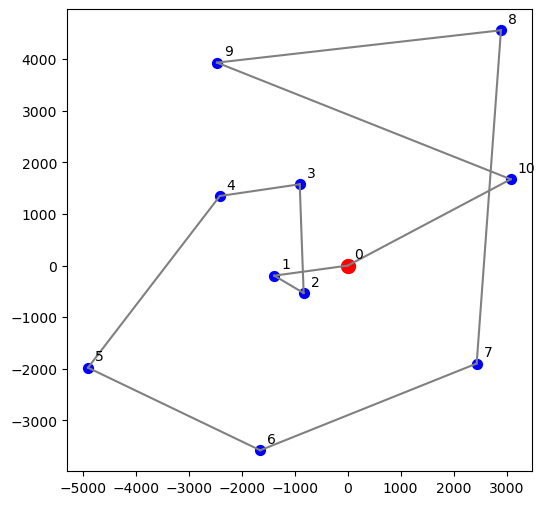

Local  Search : 42988


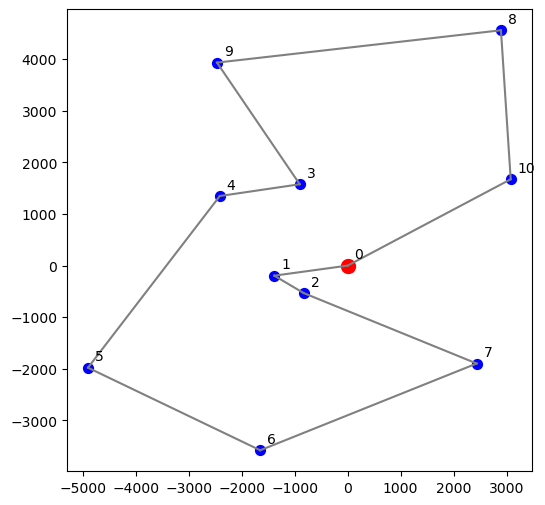

Local  Search 3: 40808


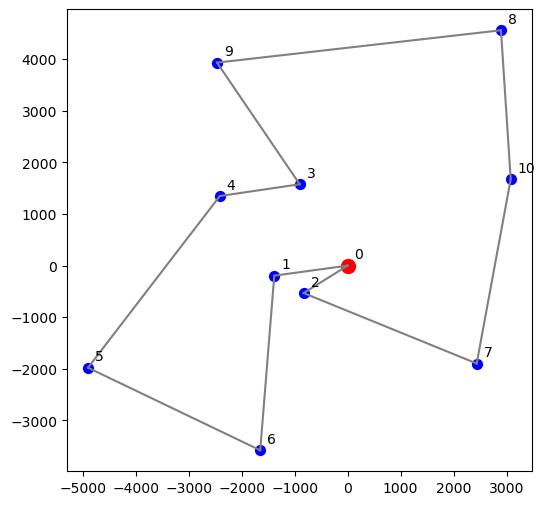

In [7]:
rd.seed(16) 
number_of_customers=10
x,y=setup()
# Pure Local Search 3opt with a random initial route
initial_route3=[0]+[x for x in range(1,number_of_customers+1)]+[0]
print("Init:", objective(initial_route3))
visualize(initial_route3)
result=local_search_3opt(initial_route3)
print("Local  Search :", objective(result))
visualize(result)
result=local_search(initial_route3)
print("Local  Search 3:", objective(result))
visualize(result)

## Step 3: Preformance Test:

## 1. Greedy Algorithm
## 2. Local Search
## 3. Greedy Algorithm + Local Search


Greedy Algorithm: 46650


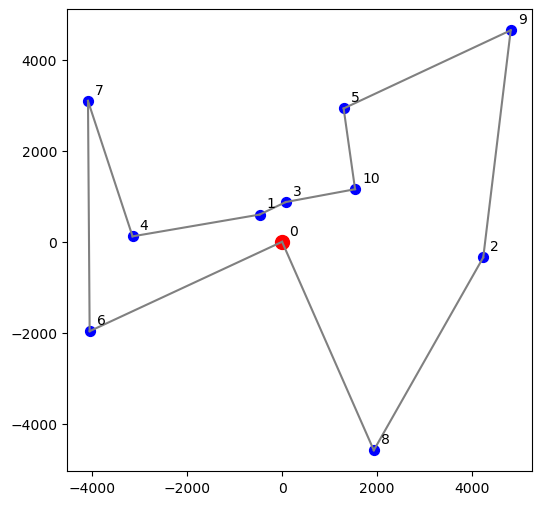

Local Search: 47262


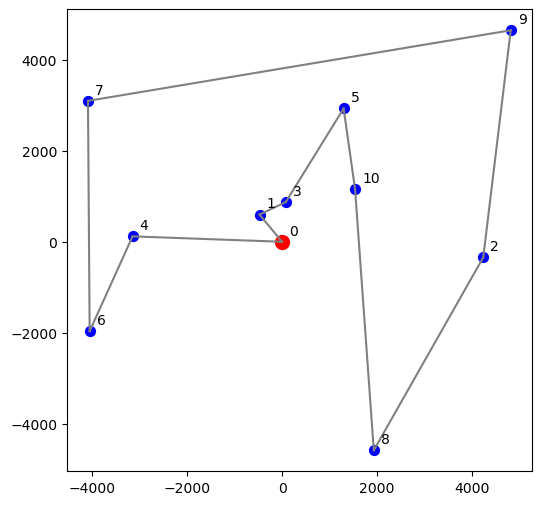

Local 3 Search: 47262


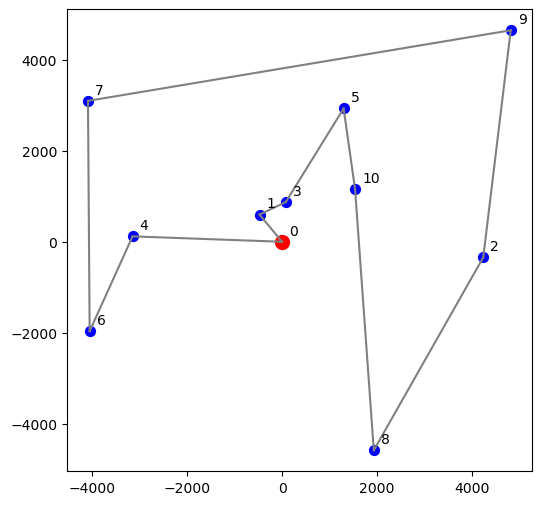

Greedy Algorithm + Local Search: 46650


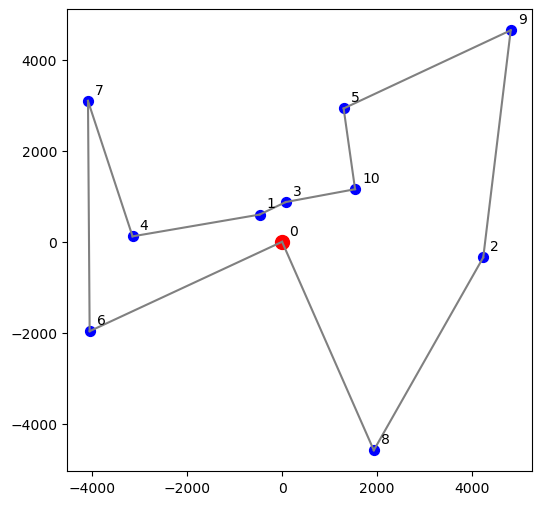

Greedy Algorithm + Local Search 3: 46650


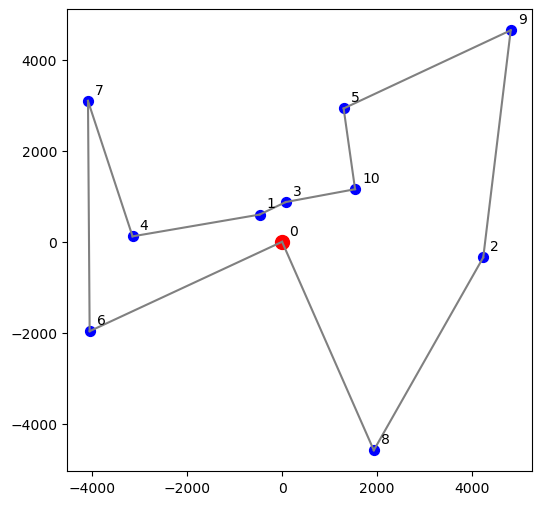

In [8]:
# Use random seed to fix the generated problem 
rd.seed(11) 
number_of_customers=10
x,y=setup()

# Pure Greedy Algorithm
result=greedy()
print("Greedy Algorithm:", objective(result))
visualize(result)


# Pure Local Search with a random initial route
initial_route=[0]+[x for x in range(1,number_of_customers+1)]+[0]
result=local_search(initial_route)
print("Local Search:", objective(result))
visualize(result)

# Pure Local Search 3opt with a random initial route
result=local_search_3opt(initial_route)
print("Local 3 Search:", objective(result))
visualize(result)

# Use Greedy Algorithm to find a good initial route, then improved by local_search
result=local_search(greedy())
print("Greedy Algorithm + Local Search:", objective(result))
visualize(result)

# Use Greedy Algorithm to find a good initial route, then improved by local_search
result=local_search_3opt(greedy())
print("Greedy Algorithm + Local Search 3:", objective(result))
visualize(result)




# Computational Simulation with Multiple Random Problems:

In [9]:
for seed in range (1,10):

    rd.seed(seed) 
    service_radius=5000
    number_of_customers=100
    x,y=setup()
    print(seed, end=". ")
    
    # Pure Greedy Algorithm
    result=greedy()
    base=objective(result)
    print("Greedy:", base/1000, end=" Kms   ")


    # Pure Local Search with a random initial route
    initial_route=[0]+[x for x in range(1,number_of_customers+1)]+[0]
    result=local_search(initial_route)
    print("Local Search: ", round((objective(result)-base)/base*100,2) ,"%", end="   ")
    

    # Use Greedy Algorithm to find a good initial route, then improved by local_search
    result=greedy()
    result=local_search(result)
    print("Greedy + Local Search:", round((objective(result)-base)/base*100,2) ,"%")
    

1. Greedy: 108.834 Kms   Local Search:  4.07 %   Greedy + Local Search: -2.46 %
2. Greedy: 118.082 Kms   Local Search:  -3.04 %   Greedy + Local Search: -4.62 %
3. Greedy: 111.682 Kms   Local Search:  -0.46 %   Greedy + Local Search: -7.07 %
4. Greedy: 107.558 Kms   Local Search:  7.36 %   Greedy + Local Search: -3.24 %
5. Greedy: 112.786 Kms   Local Search:  -5.81 %   Greedy + Local Search: -0.4 %
6. Greedy: 119.874 Kms   Local Search:  -4.63 %   Greedy + Local Search: -9.14 %
7. Greedy: 115.686 Kms   Local Search:  3.4 %   Greedy + Local Search: -5.35 %
8. Greedy: 112.69 Kms   Local Search:  2.52 %   Greedy + Local Search: -3.85 %
9. Greedy: 107.048 Kms   Local Search:  2.33 %   Greedy + Local Search: -2.23 %


In [ ]:
for seed in range (1,50):

    rd.seed(seed) 
    service_radius=5000
    number_of_customers=100
    x,y=setup()
    print(seed, end=". ")
    
    # Pure Greedy Algorithm
    result=greedy()
    base=objective(result)
    print("Greedy:", base/1000, end=" Kms   ")
    
    # Greedy and local search
    result=local_search(result)
    print("Local Search: ", round((objective(result)-base)/base*100,2) ,"%", end="  ")

    # Use Greedy Algorithm to find a good initial route, then improved by local_search3
    result=greedy()
    result=local_search_3opt(result)
    print("Greedy + Local Search 3:", round((objective(result)-base)/base*100,2) ,"%", end="  ")
    
    # Use Greedy Algorithm to find a good initial route, then improved by local_search3
    result=greedy()
    result = local_search(result)
    result=local_search_3opt(result)
    print("Greedy + Local Search + Local Search 3:", round((objective(result)-base)/base*100,2) ,"%")
    

1. Greedy: 108.834 Kms   Local Search:  -2.46 %  

# <font color=red> In-class Exercise (50 extra points)</font>

## Design a 3-opt Local Search Algorithm (a 3-opt function to replace 2-opt function) for TSP, and test all the hypotheses and questions you're curious about.

## Share your code and ideas next week.

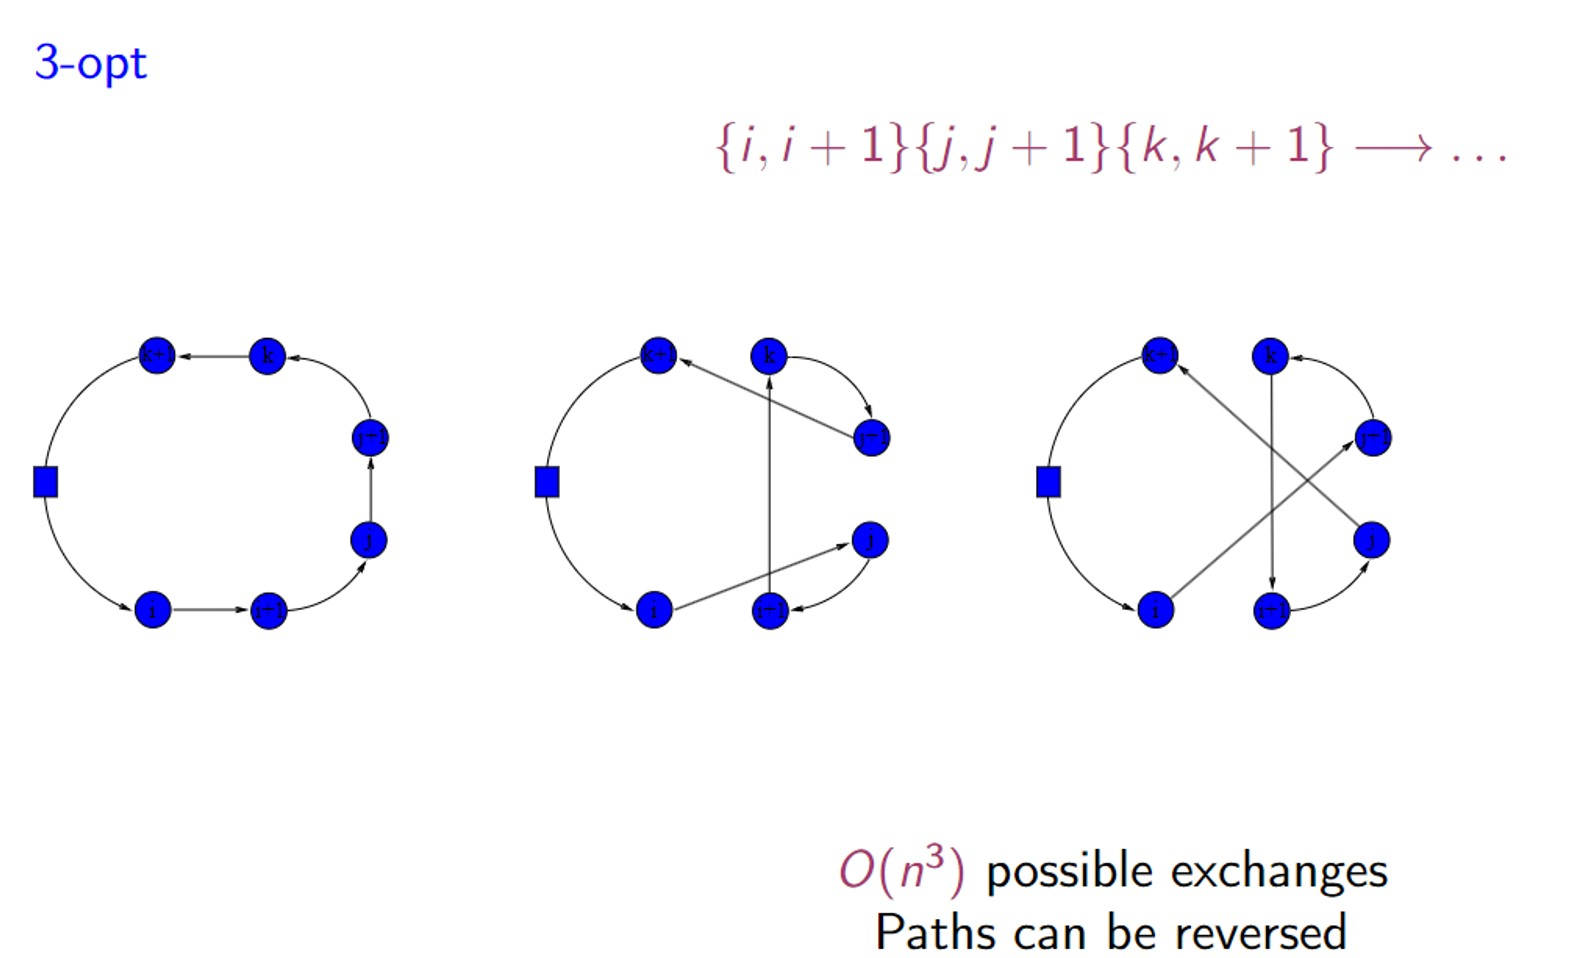

# <font color=red> Study before next class</font>

# Particle swarm optimization

## https://en.wikipedia.org/wiki/Particle_swarm_optimization